In [203]:
import numpy as np
import pandas as pd
import random as r
import matplotlib.pyplot as plt

In [204]:
r.seed(69)

In [205]:
def target(x):
    return np.sqrt(x)+np.log(x)
def f(x, y):
    err=10
    return 1 if y > (target(x))*(1+r.randrange(-err,err)/100) else 0

In [206]:
n=5000

x=[20*r.random() for i in range(n)]
y=[10*r.random() for i in range(n)]

In [207]:
df=pd.DataFrame([[x,y,f(x,y)] for x,y in zip(x,y)], columns=["x", "y", "class"])

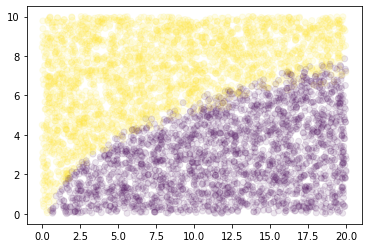

In [208]:
plt.scatter(df["x"], df["y"], c=df["class"], alpha=.1, cmap="viridis")
plt.show()

In [209]:
from sklearn import svm

In [210]:
svmc = svm.SVC()
svmc.fit(df[["x", "y"]], df["class"])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

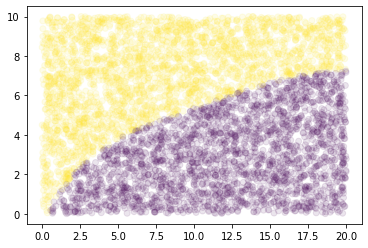

In [211]:
plt.scatter(df["x"], df["y"], c=svmc.predict(df[["x", "y"]]), alpha=.1)


In [212]:
raw_X = svmc.support_vectors_[:,0]
raw_Y = svmc.support_vectors_[:,1]

In [234]:
spl_X = sorted(raw_X)
spl_Y = [y for y,_ in sorted(zip(raw_Y, raw_X))]

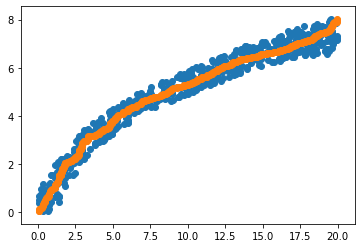

In [236]:
plt.scatter(raw_X, raw_Y)
plt.scatter(spl_X, spl_Y)

In [237]:
from scipy.interpolate import UnivariateSpline

In [238]:
spline = UnivariateSpline(spl_X, spl_Y, s=.1)

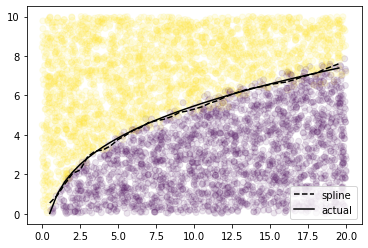

In [239]:
plt.scatter(df["x"], df["y"], c=df["class"], alpha=.1)
samps = np.arange(.5,20,.5)
plt.plot(samps, spline(samps), "--", c="black", label="spline")
plt.plot(samps, [target(x) for x in samps], "-", c="black", label="actual")
plt.legend()
plt.show()